/Users/brielin/canopy/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


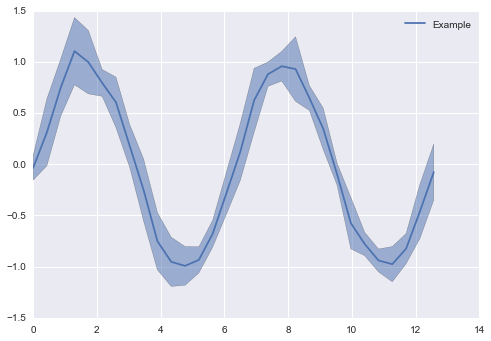

In [1]:
%matplotlib inline
from taskcode import plotting

# An example series with errorbars
plotting.main()

In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

with open('TaskCodeTimestamps.pkl','r') as infile:
    timestamps = pickle.load(infile)
    
timestamps.head()

,start_time,end_time,first_name,last_name,task,room
1,2016-05-24 17:51:45.929230+00:00,2016-05-24 18:19:35.422266+00:00,Plumber,2,10,49
2,2016-05-24 16:57:34.369723+00:00,2016-05-24 17:51:46.110982+00:00,Plumber,2,7,49
4,2016-03-01 21:09:05.088310+00:00,2016-03-02 16:24:01.019356+00:00,Plumber,2,9,24
6,2016-03-01 21:14:32.622069+00:00,2016-03-01 21:14:32.637671+00:00,Plumber,2,9,25
7,2016-03-01 21:14:32.656067+00:00,2016-03-01 21:14:32.671939+00:00,Plumber,2,9,0


In [5]:
print timestamps.count()

timestamps['duration'] = (timestamps.end_time - timestamps.start_time) / pd.Timedelta('1h')

print timestamps[timestamps.duration > 8]

start_time    858
end_time      858
first_name    858
last_name     858
task          858
room          858
duration      858
dtype: int64
                           start_time                         end_time  \
4    2016-03-01 21:09:05.088310+00:00 2016-03-02 16:24:01.019356+00:00   
56   2016-02-22 18:28:39.619262+00:00 2016-02-23 16:05:33.412534+00:00   
60   2016-02-18 22:11:26.662929+00:00 2016-02-19 15:44:24.913496+00:00   
64   2016-02-08 22:40:13.411433+00:00 2016-02-09 15:45:54.759319+00:00   
70   2016-02-05 21:13:48.407078+00:00 2016-02-08 20:14:54.532935+00:00   
180  2016-01-28 22:57:40.412017+00:00 2016-01-29 13:33:47.870669+00:00   
486  2016-02-04 21:36:07.000133+00:00 2016-02-05 15:26:45.890943+00:00   
989  2016-01-22 17:55:55.144518+00:00 2016-02-04 16:08:58.554257+00:00   
1031 2016-03-07 22:05:45.943112+00:00 2016-03-08 15:25:54.670141+00:00   

       first_name last_name  task  room    duration  
4         Plumber         2     9    24   19.248870  
56        Pl

## Quick Summary

There aren't any missing data fields, but it looks like there are a few outliers in task duration. Will ignore them in the short term, but it could be interesting to see what they look like with the location data.

task
1      79
2     148
3     108
4     134
5      17
6      48
7       4
8      53
9      55
10    109
11     81
12      1
13      7
14      5
dtype: int64


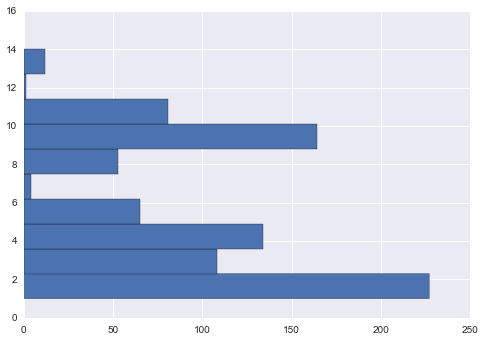

In [6]:
timestamps = timestamps[timestamps.duration <= 8]

sizes = timestamps.groupby(timestamps.task).size()
print sizes
timestamps.task.hist(orientation='horizontal')

In [7]:
common = sizes[sizes > 10].index
print common

# Keep just the common tasks for now
timestamps = timestamps[timestamps.task.isin(common)]

Int64Index([1, 2, 3, 4, 5, 6, 8, 9, 10, 11], dtype='int64', name=u'task')


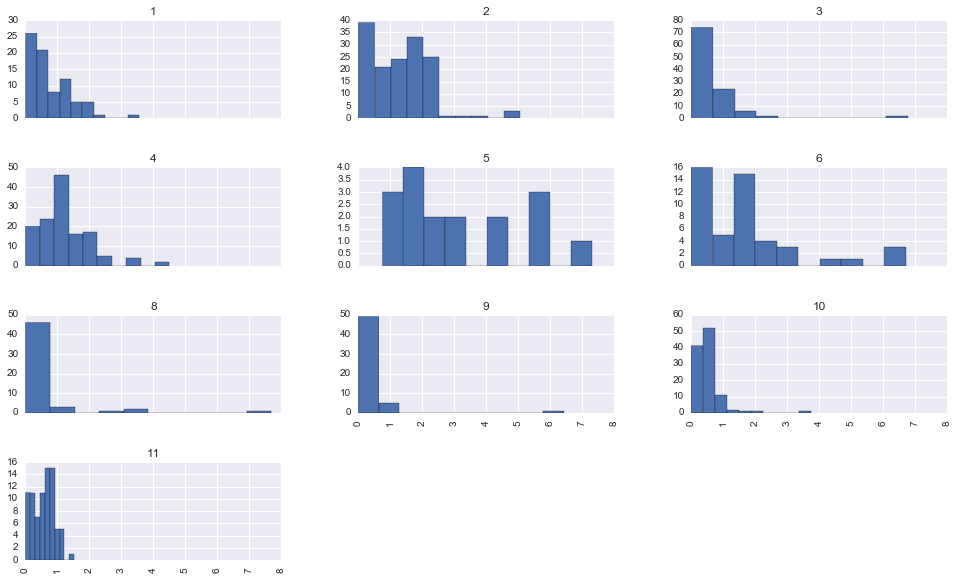

In [22]:
timestamps.duration.hist(by=timestamps.task, figsize=(16,10),sharex=True);

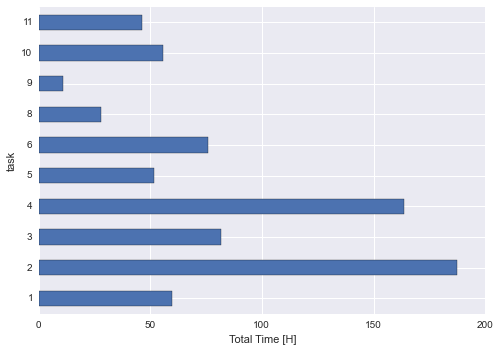

In [16]:
# How much total time per task?

timestamps.groupby(timestamps.task).sum().duration.plot(kind='barh')
plt.xlabel('Total Time [H]')

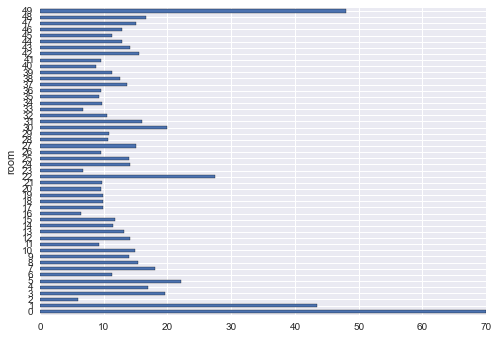

In [17]:
# How much time per room?
timestamps.groupby(timestamps.room).sum().duration.plot(kind='barh')

In [18]:
import seaborn as sns

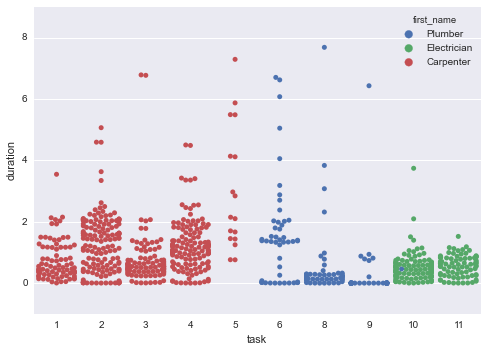

In [12]:
# Do certain skilled workers do better at some tasks than others?
# Not exactly useful because of little overlap
sns.swarmplot(data=timestamps,x="task",y="duration",hue='first_name')

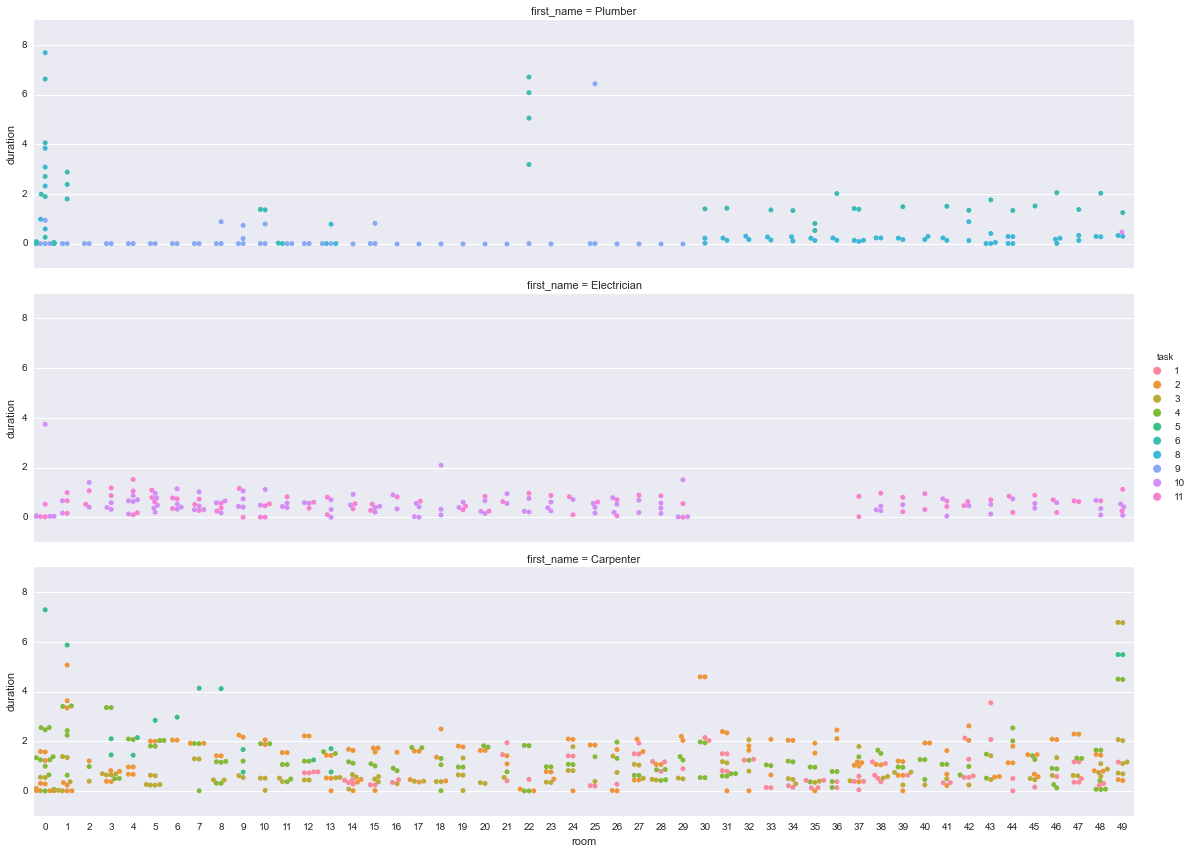

In [41]:
sns.factorplot(data=timestamps,x="room",y="duration",row='first_name',hue='task',kind="swarm",aspect=4)

In [111]:
# Michael says every room should have every job. Does it?
import numpy as np
TR = pd.DataFrame(map(lambda x: str(x[0])+'_'+str(x[1]),timestamps[["task","room"]].values))
VC = TR[0].value_counts()
TR = pd.DataFrame(np.hstack((map(lambda x: map(int,x.split('_')),VC.index),np.atleast_2d(VC.values).T)),columns=[['Task',"Room","Count"]])
TR=TR.pivot(index='Task',columns='Room',values='Count').fillna(0)

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(TR,annot=True)

# Exploring gps
It looks like the locational distribution for the different tasks is all over the map

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


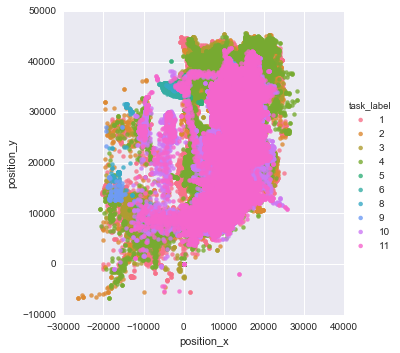

In [2]:
df = pd.read_pickle('data/gps_ids.pkl')
df = df.sort(columns = 'task_label', ascending = True)
sns.lmplot('position_x', 'position_y', data = df, hue = 'task_label', fit_reg = False)

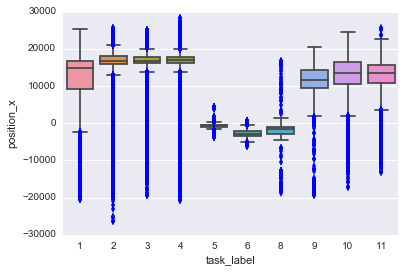

In [3]:
sns.boxplot(x = 'task_label', y = 'position_x', data = df)

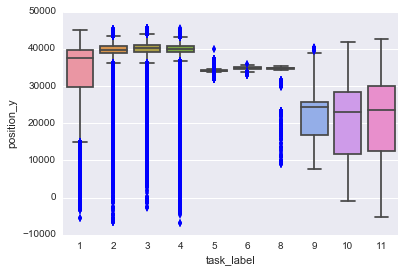

In [4]:
sns.boxplot(x = 'task_label', y = 'position_y', data = df)

In [8]:
#Means
df[['position_x', 'position_y', 'position_z']].groupby(df.task_label).mean()

,position_x,position_y,position_z
task_label,,,
1,12451.693516,33394.781454,1008.0
2,16357.180577,39097.753869,1008.0
3,15771.613478,38588.418801,1008.0
4,15887.656415,38271.901689,1008.0
5,-702.020541,34161.488969,1008.0
6,-2750.895468,34749.288674,1008.0
8,-2591.724477,31700.231242,1008.0
9,10984.886796,21580.237511,1008.0
10,13039.952520,21405.508558,1008.0


In [9]:
#Standard Errors
df[['position_x', 'position_y', 'position_z']].groupby(df.task_label).std()

,position_x,position_y,position_z
task_label,,,
1,6076.896905,9420.394631,0.0
2,2982.647314,3903.391986,0.0
3,4023.896122,5591.068145,0.0
4,3712.670871,5496.464409,0.0
5,663.382243,403.420376,0.0
6,904.588304,432.400278,0.0
8,6141.022472,6681.109115,0.0
9,5335.807718,6053.928064,0.0
10,4121.628198,9082.099702,0.0


#Other locational parameters
Let's explore how the other mean parameters vary for the different tasks

In [12]:
from taskcode import construct

In [13]:
df2 = construct.load_tasks()
df2.head()

76
1
2264
326
373
178
2980
1
2
2
44
5010
7345
5375
5050
5100
4478
3466
4945
1886
1421
6298
4460
108
6
78
214
229
17045
16786
4600
6925
2094
2135
1527
1579
1956
2377
663
1949
2225
1172
292
2188
63
2982
839
972
1454
2418
1698
1313
2423
147
2626
740
1743
1039
1978
1042
8
2459
2867
822
1014
2628
1355
1100
1212
3129
2502
3595
600
2365
2832
988
1231
556
3329
192
56
4667
24
519
2120
1698
1358
1744
1
827
700
2558
3008
646
2183
335
2731
2066
2989
2888
1545
1247
527
2201
1436
8
1891
92
2839
1294
818
1952
2401
210
1778
669
2516
2086
1322
567
1847
2800
515
686
2241
1074
2382
1858
840
2124
1532
1019
1249
2069
2144
1030
1671
2922
1756
1138
1336
1479
710
2900
1770
939
6550
289
340
2692
2459
1392
1870
1037
2297
6
1637
3777
9
10
1834
1516
1183
1168
1982
2000
1854
1271
1912
2163
540
922
2385
1499
3368
1278
3671
1373
3315
2473
1128
1786
3465
2197
4439
327
2055
394
2030
2667
553
1533
3030
2739
1495
1935
2175
2475
2907
605
2309
393
1702
2904
1225
1904
5373
195
198
3267
1624
4846
3916
1165
2574
4410
2112
71

,end_time,label,name,room,skill,start_time,0,1,2,3,...,room_40,room_41,room_42,room_43,room_44,room_45,room_46,room_47,room_48,room_49
0,2016-02-05 20:29:33.142156+00:00,9,Plumber 2,0,Plumber,2016-02-05 19:33:15.981844+00:00,7357.75,7399.05,7552,7424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-03-30 21:09:50.816095+00:00,6,Plumber 1,30,Plumber,2016-03-30 19:45:59.867041+00:00,-2697.33,-2635.2,-2674.98,-2661.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-03-30 21:09:50.816095+00:00,6,Plumber 1,30,Plumber,2016-03-30 19:45:59.867041+00:00,-2494.13,-2511.73,-2473.07,-2509.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-03-30 19:46:00.092206+00:00,6,Plumber 1,46,Plumber,2016-03-30 17:43:02.003126+00:00,-1678.67,-1488.53,-1409.33,-1486.93,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2016-03-30 19:46:00.092206+00:00,6,Plumber 1,46,Plumber,2016-03-30 17:43:02.003126+00:00,-2823.2,-3050.13,-3169.07,-2612.53,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
df2['mean_x'] = df2.iloc[:, 4:34].mean(axis = 1)
df2['mean_x'] = df2.iloc[:, 34:64].mean(axis = 1)
df2['mean_dist'] = df2.iloc[:, 64:94].mean(axis = 1)
df2['mean_vel'] = df2.iloc[:, 154:184].mean(axis = 1)
df2['mean_velx_rms'] = df2.iloc[:, 184:214].mean(axis = 1)
df2['mean_vely_rms'] = df2.iloc[:, 214:244].mean(axis = 1)
df2['mean_velx'] = df2.iloc[:, 244:274].mean(axis = 1)
df2['mean_vely'] = df2.iloc[:, 274:304].mean(axis = 1)
df2['mean_accel'] = df2.iloc[:,304:334].mean(axis = 1)
df2['mean_accelx_rms'] = df2.iloc[:, 334:364].mean(axis = 1)
df2['mean_accely_rms'] = df2.iloc[:, 364:394].mean(axis = 1)

In [19]:
df3 = df2.iloc[:, 509:]
df3['label'] = df2['label']

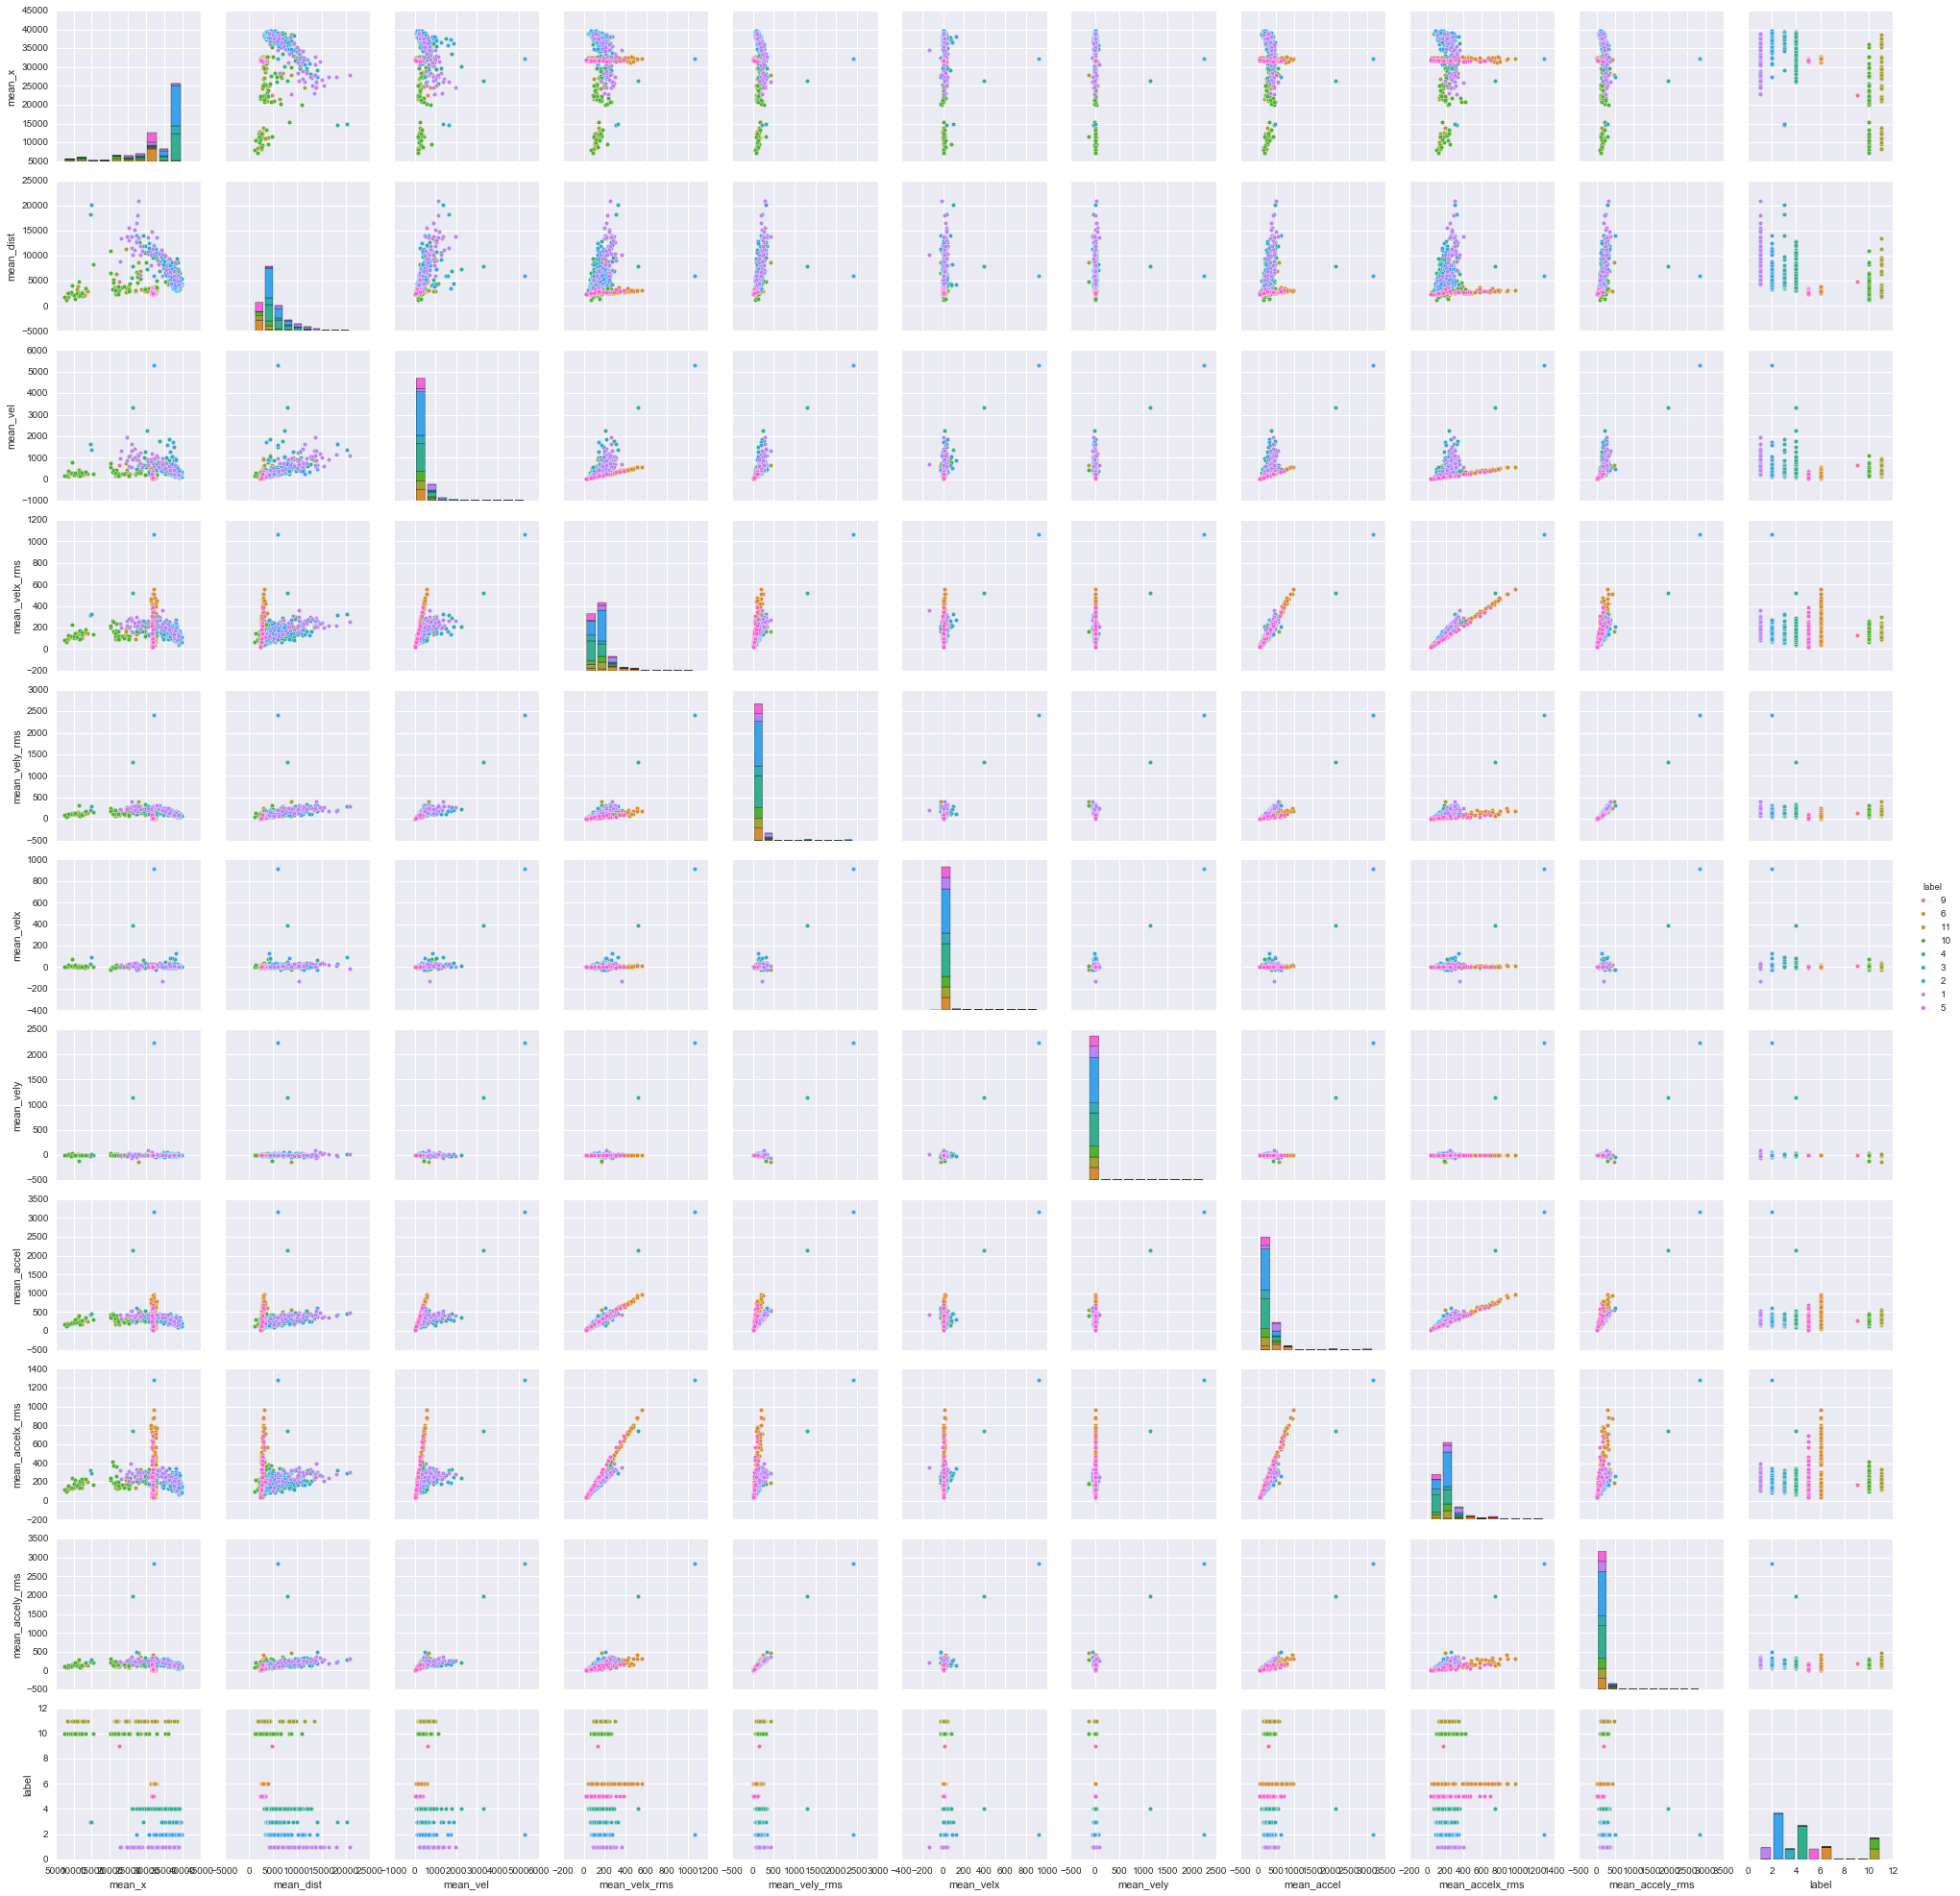

In [22]:
sns.pairplot(df3, hue = 'label')